
1. Set Up

In the initial setup, I import all the essential libraries for the project. This includes os for file operations, cv2 for image processing, numpy for numerical operations, and libraries from sklearn for machine learning tasks. Additionally, I use skimage.feature to extract Histogram of Oriented Gradients (HOG) features from the images, and matplotlib.pyplot for data visualization.

In [11]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import matplotlib.pyplot as plt


2. Data Loading

I have a load_data function that loads images and their labels from a specified directory. This function navigates through each subdirectory and image file, reading images in grayscale using OpenCV. It collects these images and their corresponding labels into lists..

In [12]:
def load_data(data_dir):
    images = []
    labels = []
    for folder in os.listdir(data_dir):
        label = folder
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(label)
    return images, labels


3. Data Processing

In the data processing phase, I first define a function extract_hog_features to extract HOG features from the images, which is crucial for capturing the essential aspects of the image data. Then, in preprocess_data, I resize images to 64x64 pixels, better fitting the HOG feature extraction. After extracting these features, I normalize them using StandardScaler from sklearn, which is essential to standardize our features and often leads to improved performance of 



In [13]:
def load_data(data_dir):
    images = []
    labels = []
    for folder in os.listdir(data_dir):
        label = folder
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(label)
    return images, labels

# Load training and testing data
training_data_dir ='/kaggle/input/standard-ocr-dataset/data/training_data'
testing_data_dir = '/kaggle/input/standard-ocr-dataset/data/testing_data'
train_images, train_labels = load_data(training_data_dir)
test_images, test_labels = load_data(testing_data_dir)


In [14]:
def preprocess_data(images):
    processed_images = []
    for img in images:
        img = cv2.resize(img, (64, 64))  # Resize images for better HOG feature extraction
        hog_features = extract_hog_features(img)
        processed_images.append(hog_features)  # Use HOG features
    return np.array(processed_images)

# 4. Feature Extraction
def extract_hog_features(image):
    # Extract Histogram of Oriented Gradients (HOG) features
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
    return features

4. Data Visualization

For data visualization, I have the display_images function. It displays the first 25 images in the dataset with their corresponding labels. This visual inspection is vital to ensure the integrity of our data and to understand its characteristics.

In [15]:
def display_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)  # Display the original images
        plt.xlabel(labels[i])
    plt.show()


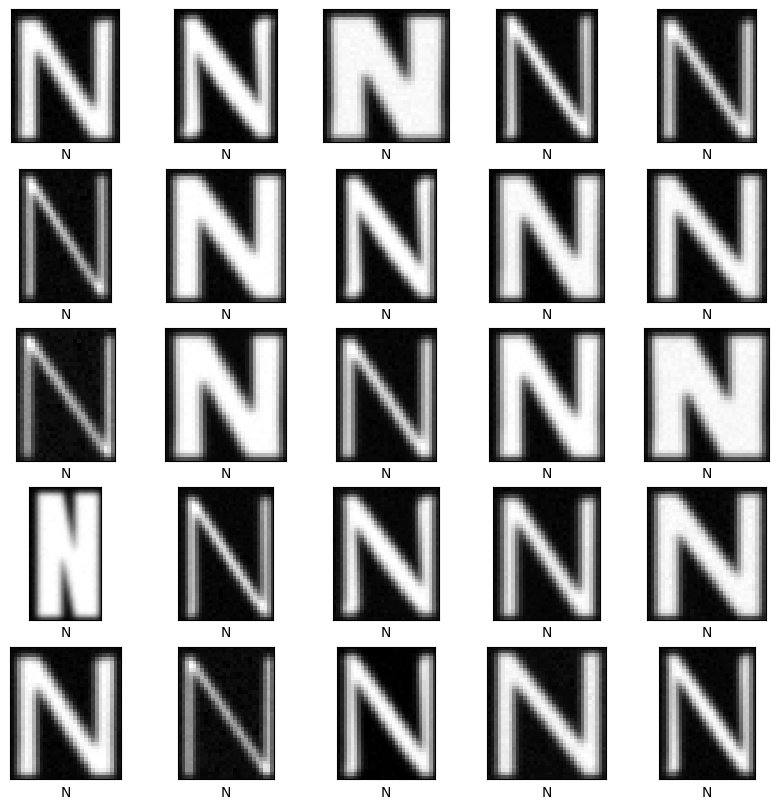

In [16]:
# Load and preprocess data
training_data_dir = '/kaggle/input/standard-ocr-dataset/data/testing_data'
testing_data_dir = '/kaggle/input/standard-ocr-dataset/data/training_data'
train_images, train_labels = load_data(training_data_dir)
test_images, test_labels = load_data(testing_data_dir)
X_train = preprocess_data(train_images)
X_test = preprocess_data(test_images)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display a sample of training images
display_images(train_images[:25], train_labels[:25])

5. Model Building

For model building, I create a KNN classifier and employ GridSearchCV for hyperparameter tuning. This process is exhaustive but necessary to find the best parameters for the model. GridSearchCV systematically works through multiple combinations of parameters and cross-validates to determine the best performing set.

In [17]:
knn_classifier = KNeighborsClassifier()
parameters = {'n_neighbors': range(1, 10), 'weights': ['uniform', 'distance']}
clf = GridSearchCV(knn_classifier, parameters, cv=5)
clf.fit(X_train, train_labels)

# Evaluate the best model found by GridSearchCV
best_knn = clf.best_estimator_
print("Best KNN Parameters:", clf.best_params_)

Best KNN Parameters: {'n_neighbors': 4, 'weights': 'distance'}


6. Model Predictions

In the final step, I evaluate the best model parameters obtained from GridSearchCV and then use the best model to make predictions on the test dataset. I calculate the accuracy of these predictions to measure the performance of the model. Optionally, I also display some test images along with their predicted labels to visually assess how well the model is performing.

Accuracy: 0.8857863098700796


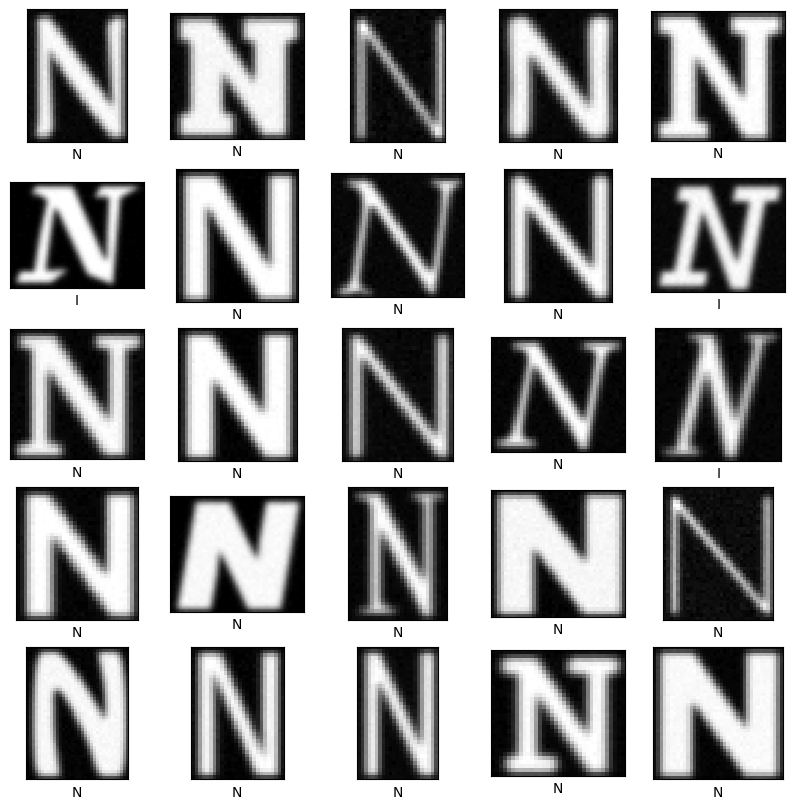

In [18]:
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

# Optionally, display some test images along with predicted labels
display_images(test_images[:25], y_pred[:25])